In [280]:
import numpy as np
import pandas as pd
import pprint
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

pd.options.display.float_format = '{:.3f}'.format

### <font color="orange">  **Data Loading and Visualizaiton** </font>

In [281]:
df = pd.read_csv('health_insurance_train.csv')
df_autograder = pd.read_csv('health_insurance_autograde.csv')
                            
display(df.iloc[8:16])
display(df_autograder.iloc[8:16])

,whrswk,hhi,whi,hhi2,education,race,hispanic,experience,kidslt6,kids618,husby,region
8,5.000,yes,no,yes,13-15years,NaN,no,20.000,1.000,1.000,53.000,south
9,40.000,no,yes,yes,12years,white,no,9.000,1.000,1.000,18.000,west
10,40.000,no,no,no,12years,white,no,33.000,0.000,0.000,0.000,other
11,40.000,no,no,no,9-11years,white,no,5.500,1.000,0.000,20.000,northcentral
12,35.000,no,yes,no,12years,NaN,yes,26.000,0.000,1.000,0.000,south
13,45.000,no,yes,yes,16years,white,no,7.000,0.000,0.000,40.000,south
14,0.000,yes,no,yes,12years,white,no,38.000,0.000,0.000,0.000,other
15,20.000,yes,no,yes,12years,white,no,9.000,1.000,1.000,33.000,south


,hhi,whi,hhi2,education,race,hispanic,experience,kidslt6,kids618,husby,region
8,yes,yes,yes,13-15years,white,no,35.000,0.000,0.000,52.861,south
9,no,yes,no,16years,white,no,1.000,0.000,0.000,5.000,northcentral
10,no,no,no,12years,white,no,14.000,NaN,NaN,0.000,northcentral
11,no,yes,no,12years,white,no,44.000,NaN,NaN,0.000,west
12,no,yes,yes,13-15years,white,no,23.000,0.000,3.000,45.000,west
13,no,yes,no,16years,white,no,10.000,0.000,0.000,0.000,south
14,yes,no,yes,>16years,white,no,23.000,0.000,0.000,40.100,west
15,yes,no,yes,12years,white,no,22.000,1.000,0.000,24.846,other


In [282]:
''''
* Data visualization (Edlyn)
- Make nice histograms of the features and the target
- Make a covariance matrix of the features
'''

"'\n* Data visualization (Edlyn)\n- Make nice histograms of the features and the target\n- Make a covariance matrix of the features\n"

### <font color="orange">  **Data processing fucntions** </font>

In [283]:
''''
* Create the data pipeline functions (Edlyn)

- Preprocess data (PIPE 1, PIPE 2)
    . Apply one hot encoding for region, race and hispanic. Make a column for race_nan and hispanic_nan. 
      People that decide to not fill these information might have a characteristic profile. So we can let the
      model decide if it is important or not.

    . Make remaining yes/no 1 and -1 (helps KNN, since the features are logically opoosite of each other)

    . Make True/False 1 and 0 (When it is not just about "yes/no" give 1 to True and 0 to False)

    . Process education column, nan becomes average 

    . You can apply remove first if you want


- Regular scaling (PIPE 1) 

- Selective scaling (PIPE 2)

- Data filtering with mahalanobis (PIPE 2)

'''


'\'\n* Create the data pipeline functions (Edlyn)\n\n- Preprocess data (PIPE 1, PIPE 2)\n    . Apply one hot encoding for region, race and hispanic. Make a column for race_nan and hispanic_nan. \n      People that decide to not fill these information might have a characteristic profile. So we can let the\n      model decide if it is important or not.\n\n    . Make remaining yes/no 1 and -1 (helps KNN, since the features are logically opoosite of each other)\n\n    . Make True/False 1 and 0 (When it is not just about "yes/no" give 1 to True and 0 to False)\n\n    . Process education column, nan becomes average \n\n    . You can apply remove first if you want\n\n\n- Regular scaling (PIPE 1) \n\n- Selective scaling (PIPE 2)\n\n- Data filtering with mahalanobis (PIPE 2)\n\n'

### <font color="orange">  **Pipeline creation** </font>

In [284]:
df_1 = pd.read_csv('health_insurance_train_processed.csv')# Use the pipiline 1 function function instead of this file

display(df_1.iloc[9:30])

,whrswk,hhi,whi,hhi2,education,experience,kidslt6,kids618,husby,race_black,race_other,race_white,race_nan,reg_northcentral,reg_other,reg_south,reg_west,hisp_no,hisp_yes
9,0.766,-1,1,1,-0.401,-1.201,1.074,0.313,-0.392,0,0,1,0,0,0,0,1,1,0
10,0.766,-1,-1,-1,-0.401,0.875,-0.549,-0.746,-1.150,0,0,1,0,0,1,0,0,1,0
11,0.766,-1,-1,-1,-1.158,-1.504,1.074,-0.746,-0.308,0,0,1,0,1,0,0,0,1,0
12,0.499,-1,1,-1,-0.401,0.269,-0.549,0.313,-1.150,0,0,0,1,0,0,1,0,0,1
13,1.033,-1,1,1,1.112,-1.374,-0.549,-0.746,0.535,0,0,1,0,0,0,1,0,1,0
14,-1.372,1,-1,1,-0.401,1.307,-0.549,-0.746,-1.150,0,0,1,0,0,1,0,0,1,0
15,-0.303,1,-1,1,-0.401,-1.201,1.074,0.313,0.240,0,0,1,0,0,0,1,0,1,0
16,-1.372,1,-1,1,-0.401,-1.720,0.000,-0.000,-0.966,1,0,0,0,0,0,0,1,1,0
17,0.766,-1,1,1,-0.401,0.615,-0.549,-0.746,1.378,0,0,1,0,0,1,0,0,0,1
18,-1.372,1,-1,1,0.355,0.961,-0.549,-0.746,3.064,0,0,1,0,0,1,0,0,1,0


In [285]:
df_2 = pd.read_csv('health_insurance_train_processed.csv') # Use the pipiline 2 function instead of this file

display(df_2.iloc[9:30])

,whrswk,hhi,whi,hhi2,education,experience,kidslt6,kids618,husby,race_black,race_other,race_white,race_nan,reg_northcentral,reg_other,reg_south,reg_west,hisp_no,hisp_yes
9,0.766,-1,1,1,-0.401,-1.201,1.074,0.313,-0.392,0,0,1,0,0,0,0,1,1,0
10,0.766,-1,-1,-1,-0.401,0.875,-0.549,-0.746,-1.150,0,0,1,0,0,1,0,0,1,0
11,0.766,-1,-1,-1,-1.158,-1.504,1.074,-0.746,-0.308,0,0,1,0,1,0,0,0,1,0
12,0.499,-1,1,-1,-0.401,0.269,-0.549,0.313,-1.150,0,0,0,1,0,0,1,0,0,1
13,1.033,-1,1,1,1.112,-1.374,-0.549,-0.746,0.535,0,0,1,0,0,0,1,0,1,0
14,-1.372,1,-1,1,-0.401,1.307,-0.549,-0.746,-1.150,0,0,1,0,0,1,0,0,1,0
15,-0.303,1,-1,1,-0.401,-1.201,1.074,0.313,0.240,0,0,1,0,0,0,1,0,1,0
16,-1.372,1,-1,1,-0.401,-1.720,0.000,-0.000,-0.966,1,0,0,0,0,0,0,1,1,0
17,0.766,-1,1,1,-0.401,0.615,-0.549,-0.746,1.378,0,0,1,0,0,1,0,0,0,1
18,-1.372,1,-1,1,0.355,0.961,-0.549,-0.746,3.064,0,0,1,0,0,1,0,0,1,0


In [286]:
# Split the data into seen and unseen while keeping it as a pandas dataframe
fraction = 0.2  # 20% of the rows

#-------------------PIPE 1-------------------
df_unseen_1 = df_1.sample(frac = fraction, random_state=42) # Get 20% of random rows
df_seen_1 = df_1.drop(df_unseen_1.index) # Get the remaining 80% of the rows

X_seen_1 = df_seen_1.iloc[:, 1:]
Y_seen_1 = df_seen_1.iloc[:, 0]

X_unseen_1 = df_unseen_1.iloc[:, 1:]
Y_unseen_1 = df_unseen_1.iloc[:, 0]

#-------------------PIPE 2-------------------
df_unseen_2 = df_2.sample(frac = fraction, random_state=42)
df_seen_2 = df_2.drop(df_unseen_2.index)

X_seen_2 = df_seen_2.iloc[:, 1:]
Y_seen_2 = df_seen_2.iloc[:, 0]

X_unseen_2 = df_unseen_2.iloc[:, 1:]
Y_unseen_2 = df_unseen_2.iloc[:, 0]


### <font color="orange">  **Training Functions** </font>

In [287]:

#-------------------Dummy-------------------
from sklearn.dummy import DummyRegressor
def train_dummy_predictor(X, Y):
    model = DummyRegressor(strategy='mean')
    model.fit(X, Y)
    return model

#-------------------KNN-------------------
from sklearn.neighbors import KNeighborsRegressor
def train_knn_regressor(X, Y, param_grid):
    model = KNeighborsRegressor(**param_grid)
    model.fit(X, Y)
    Y_pred = model.predict(X)
    loss_values = [mean_absolute_error(Y, Y_pred)]
    return model,loss_values

#-------------------SGD-------------------
from sklearn.linear_model import SGDRegressor
def train_sgd_regressor(X, Y, params):
    model = SGDRegressor(**params)
    epochs = params['max_iter']

    loss_values = []
    for epoch in range(epochs):
        model.partial_fit(X, Y)
        Y_pred = model.predict(X)
        epoch_loss = mean_absolute_error(Y, Y_pred)
        loss_values.append(epoch_loss)
    
    return model, loss_values

#-----------Decision Tree-------------------
from sklearn.tree import DecisionTreeRegressor
def train_decision_tree_regressor(X, Y, params):

    '''params : dict
        Dictionary of parameters to pass to DecisionTreeRegressor.'''
    
    # splitter = Supported strategies are "best" to choose the best split and "random" to choose the best random split.
    # max_features = The number of features to consider when looking for the best split
    # min_samples_split = The minimum number of samples required to split an internal node
    # min_samples_leaf = The minimum number of samples required to be at a leaf node

    model = DecisionTreeRegressor(**params,random_state = 42)
    loss_values = []
    
    # Custom training loop with logging
    for depth in range(1, params['max_depth'] + 1):
        model.set_params(max_depth=depth)
        model.fit(X, Y)
        Y_pred = model.predict(X)
        loss = mean_absolute_error(Y, Y_pred)
        loss_values.append(loss)
    
    return model, loss_values


### <font color="orange">  **Logistic Adjustment** </font>

In [288]:
def soft_max_adjustnent(value, target1 = -1.372319745743416, target2= 0.765866095571318 , gamma=5):
    # Calculate the distance to each target
    dist_to_target1 = abs(value - target1)
    dist_to_target2 = abs(value - target2)
    
    # Transform the distance to probability
    # Assumed the distance follows a Exponential distribution
    prob_target1 = np.exp(-gamma * dist_to_target1)
    prob_target2 = np.exp(-gamma * dist_to_target2)
    
    # Normalize the probabilities using soft max
    total_prob = prob_target1 + prob_target2
    prob_target1 /= total_prob
    prob_target2 /= total_prob
    
    # Adjust the value based on the probabilities
    adjusted_value = prob_target1 * target1 + prob_target2 * target2
    
    return adjusted_value

### <font color="orange">  **Create model dict and test dataframe** </font>

In [289]:

#----------Creation of models dict-----------
models_dict_1 = {'KNN': None, 'SGD': None, 'Tree':None}
models_dict_2 = {'KNN': None, 'SGD': None, 'Tree':None}

for key in models_dict_1:
    models_dict_1[key] = {'defalt' :None, 'best_param':None, 'best_model' :None, 'ensemble':None, 'best_ensemble':None}
    models_dict_2[key] = {'defalt' :None, 'best_param':None, 'best_model' :None, 'ensemble':None, 'best_ensemble':None}

#----------Creation of test dfs-----------
test_df_1 = pd.DataFrame(index=['D','T','TA','ET','BET','BETA'],columns=['KNN','SGD','Tree'])
test_df_2 = pd.DataFrame(index=['D','T','TA','ET','BET','BETA'],columns=['KNN','SGD','Tree'])

### <font color="orange">  **Store and test default models** </font>

In [290]:
####################################################################
# ------ KNN REGRESSOR
model = KNeighborsRegressor()
model.fit(X_seen_1, Y_seen_1)
models_dict_1['KNN']['defalt'] = model
test_df_1.loc['D','KNN'] = mean_absolute_error(Y_unseen_1, model.predict(X_unseen_1))

model = KNeighborsRegressor()
model.fit(X_seen_2, Y_seen_2)
models_dict_2['KNN']['defalt'] = model
test_df_2.loc['D','KNN'] = mean_absolute_error(Y_unseen_2, model.predict(X_unseen_2))


####################################################################
# ------ SGD REGRESSOR
model = SGDRegressor()
model.fit(X_seen_1, Y_seen_1)
models_dict_1['SGD']['defalt'] = model
test_df_1.loc['D','SGD'] = mean_absolute_error(Y_unseen_1, model.predict(X_unseen_1))

model = SGDRegressor()
model.fit(X_seen_2,  Y_seen_2)
models_dict_2['SGD']['defalt'] = model
test_df_2.loc['D','SGD'] = mean_absolute_error(Y_unseen_2, model.predict(X_unseen_2))

####################################################################
# ------ DECISION TREE REGRESSOR
model = DecisionTreeRegressor()
model.fit(X_seen_1, Y_seen_1)
models_dict_1['Tree']['defalt'] = model
test_df_1.loc['D','Tree'] = mean_absolute_error(Y_unseen_1, model.predict(X_unseen_1))

model = DecisionTreeRegressor()
model.fit(X_seen_2, Y_seen_2)
models_dict_2['Tree']['defalt'] = model
test_df_2.loc['D','Tree'] = mean_absolute_error(Y_unseen_2, model.predict(X_unseen_2))


### <font color="orange">  **Perform grid search, test, store best models and parameters** </font>

In [306]:

def grid_search(X, Y, model, param_grid, cv=5):
    
    # cv = It determines the cross-validation splitting strategy used to evaluate the performance of the model for each combination of hyperparameters
    # This means that the dataset will be split into 5 parts (folds). The model will be trained on 4 parts and tested on the remaining part.
    # This process will be repeated 5 times, each time with a different part as the test set.
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
    
    # Fit the model
    print("Working on grid search")
    grid_search.fit(X, Y)
    
    # Get the best model and parameters
    best_model = grid_search.best_estimator_
    best_params = grid_search.best_params_
    
    print(f"Best parameters: {best_params}\n")
    
    return best_model, best_params


def search_train_test_store(model, param_grid, X_seen, Y_seen, X_unseen, Y_unseen, models_dict, model_name, test_df):
    # Perform grid search
    best_model, best_params = grid_search(X_seen, Y_seen, model, param_grid, cv=5)
    models_dict[model_name]['best_model'] = best_model
    models_dict[model_name]['best_param'] = best_params
    
    # Predict and calculate errors
    Y_pred = best_model.predict(X_unseen)
    test_df.loc['T', model_name] = mean_absolute_error(Y_unseen, Y_pred)
    Y_pred_adjusted = np.array([soft_max_adjustnent(value) for value in Y_pred])
    test_df.loc['TA', model_name] = mean_absolute_error(Y_unseen, Y_pred_adjusted)

# Define parameter grids
param_grid_KNN = {
    'n_neighbors': [3, 5, 7, 9, 11, 13, 15, 17, 19, 21],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]  # 1 for Manhattan distance, 2 for Euclidean distance
}

param_grid_Tree = {
    'criterion': ['squared_error', 'absolute_error'],
    'splitter': ['random'], # Random worked better than best almost every time
    'max_depth': [8 , 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4, 8],
    'max_features': [None] # All features are considered for each split
}

param_grid_SGD = {
    'alpha': [0.0001, 0.001, 0.01, 0.1],
    'penalty': ['l2', 'l1', 'elasticnet'],
    'learning_rate': ['constant', 'optimal', 'invscaling', 'adaptive'],
    'eta0': [0.00001, 0.0001],
    'max_iter': [50, 100, 200],
}

# Train and evaluate models
print("------ KNN Regressor -----")
search_train_test_store(KNeighborsRegressor(), param_grid_KNN, X_seen_1, Y_seen_1, X_unseen_1, Y_unseen_1, models_dict_1, 'KNN', test_df_1)
search_train_test_store(KNeighborsRegressor(), param_grid_KNN, X_seen_2, Y_seen_2, X_unseen_2, Y_unseen_2, models_dict_2, 'KNN', test_df_2)

print("------ Decision Tree Regressor -----")
search_train_test_store(DecisionTreeRegressor(random_state=42), param_grid_Tree, X_seen_1, Y_seen_1, X_unseen_1, Y_unseen_1, models_dict_1, 'Tree', test_df_1)
search_train_test_store(DecisionTreeRegressor(random_state=42), param_grid_Tree, X_seen_2, Y_seen_2, X_unseen_2, Y_unseen_2, models_dict_2, 'Tree', test_df_2)

print("------ SGD Regressor -----")
search_train_test_store(SGDRegressor(random_state=42), param_grid_SGD, X_seen_1, Y_seen_1, X_unseen_1, Y_unseen_1, models_dict_1, 'SGD', test_df_1)
search_train_test_store(SGDRegressor(random_state=42), param_grid_SGD, X_seen_2, Y_seen_2, X_unseen_2, Y_unseen_2, models_dict_2, 'SGD', test_df_2)

# Display results
display(test_df_1)
display(test_df_2)


------ KNN Regressor -----
Working on grid search
Best parameters: {'n_neighbors': 19, 'p': 2, 'weights': 'uniform'}

Working on grid search
Best parameters: {'n_neighbors': 19, 'p': 2, 'weights': 'uniform'}

------ Decision Tree Regressor -----
Working on grid search
Best parameters: {'criterion': 'absolute_error', 'max_depth': 8, 'max_features': None, 'min_samples_leaf': 4, 'min_samples_split': 2, 'splitter': 'random'}

Working on grid search
Best parameters: {'criterion': 'absolute_error', 'max_depth': 8, 'max_features': None, 'min_samples_leaf': 4, 'min_samples_split': 2, 'splitter': 'random'}

------ SGD Regressor -----
Working on grid search
Best parameters: {'alpha': 0.0001, 'eta0': 0.0001, 'learning_rate': 'adaptive', 'max_iter': 50, 'penalty': 'l2'}

Working on grid search
Best parameters: {'alpha': 0.0001, 'eta0': 0.0001, 'learning_rate': 'adaptive', 'max_iter': 50, 'penalty': 'l2'}



,KNN,SGD,Tree
D,0.642,0.669,0.729
T,0.627,0.662,0.580
TA,0.583,0.561,0.609
ET,NaN,NaN,NaN
BET,NaN,NaN,NaN
BETA,NaN,NaN,NaN


,KNN,SGD,Tree
D,0.642,0.664,0.739
T,0.627,0.662,0.580
TA,0.583,0.561,0.609
ET,NaN,NaN,NaN
BET,NaN,NaN,NaN
BETA,NaN,NaN,NaN


### <font color="orange">  **Ensemble training and validation loss** </font>

In [272]:
def train_models(X_seen,Y_seen,params, model_train_function, n_models = 10, val_size = 0.2):

    models_training_loss = []
    models_val_loss = []
    model_list = []


    for n in range(n_models):
        X_train, X_val, Y_train, Y_val = train_test_split(X_seen, Y_seen, test_size= val_size, random_state= 42*n)

        model, loss_values = model_train_function(X_train, Y_train, params)
        
        model_list.append(model)
        models_training_loss.append(loss_values)

        Y_pred = model.predict(X_val)
        val_loss = mean_absolute_error(Y_val, Y_pred)
        models_val_loss.append(val_loss)
    
    return model_list, models_training_loss, models_val_loss

n_models = 30

# Create a dataframe to store the validation loss of each model with the mean at the end
Ensembles_val_loss_1 = pd.DataFrame(index=range(n_models + 1))
Ensembles_val_loss_1.rename(index={n_models: 'mean'}, inplace=True)

Ensembles_val_loss_2 = pd.DataFrame(index=range(n_models + 1))
Ensembles_val_loss_2.rename(index={n_models: 'mean'}, inplace=True)

In [273]:
def train_and_record(models_dict, X_seen, Y_seen, regressor_type, train_function, Ensembles_val_loss, n_models):
    models_dict[regressor_type]['ensemble'], models_training_loss, models_val_loss = train_models(X_seen, Y_seen, models_dict[regressor_type]['best_param'], train_function, n_models=n_models)
    
    Ensembles_val_loss.loc[:n_models - 1, regressor_type] = models_val_loss
    Ensembles_val_loss.loc['mean', regressor_type] = Ensembles_val_loss[regressor_type].mean()
    return models_training_loss

models_training_loss_SGD_1 = train_and_record(models_dict_1, X_seen_1, Y_seen_1, 'SGD', train_sgd_regressor, Ensembles_val_loss_1, n_models)
models_training_loss_SGD_2 = train_and_record(models_dict_2, X_seen_2, Y_seen_2, 'SGD', train_sgd_regressor, Ensembles_val_loss_2, n_models)

models_training_loss_KNN_1 = train_and_record(models_dict_1, X_seen_1, Y_seen_1, 'KNN', train_knn_regressor, Ensembles_val_loss_1, n_models)
models_training_loss_KNN_2 = train_and_record(models_dict_2, X_seen_2, Y_seen_2, 'KNN', train_knn_regressor, Ensembles_val_loss_2, n_models)

models_training_loss_Tree_1 = train_and_record(models_dict_1, X_seen_1, Y_seen_1, 'Tree', train_decision_tree_regressor, Ensembles_val_loss_1, n_models)
models_training_loss_Tree_2 = train_and_record(models_dict_2, X_seen_2, Y_seen_2, 'Tree', train_decision_tree_regressor, Ensembles_val_loss_2, n_models)


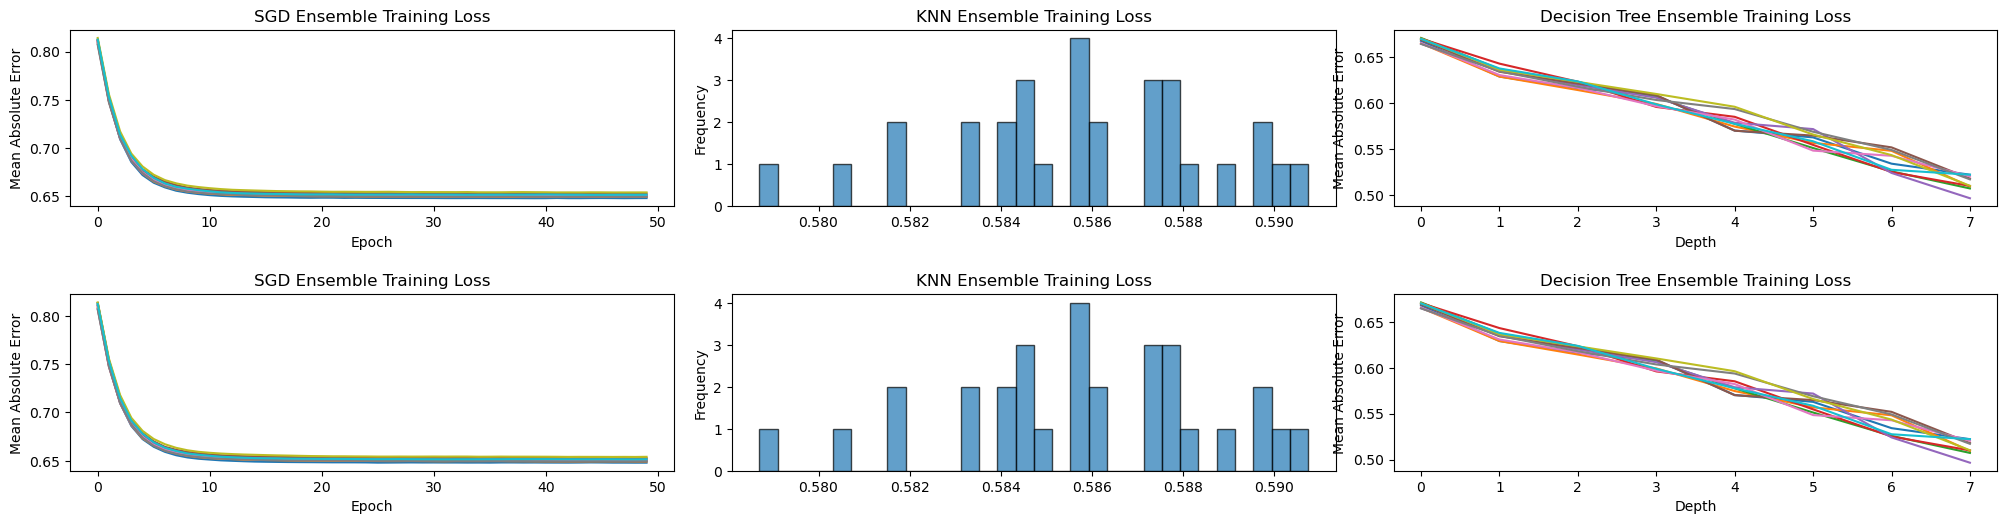

,SGD,KNN,Tree,SGD,KNN,Tree
0,0.661,0.622,0.583,0.661,0.622,0.583
1,0.635,0.616,0.575,0.635,0.616,0.575
2,0.655,0.607,0.596,0.656,0.607,0.596
3,0.656,0.623,0.582,0.656,0.623,0.582
4,0.646,0.613,0.584,0.646,0.613,0.584
5,0.663,0.630,0.604,0.663,0.630,0.604
6,0.650,0.611,0.597,0.650,0.611,0.597
7,0.667,0.628,0.633,0.667,0.628,0.633
8,0.648,0.625,0.616,0.648,0.625,0.616
9,0.650,0.620,0.606,0.650,0.620,0.606


In [274]:
fig, ax = plt.subplots(2, 3, figsize=(20, 5))
plt.tight_layout()
plt.subplots_adjust(hspace=0.5)

for loss_values in models_training_loss_SGD_1[::3]: # Plot every 3rd model
    ax[0, 0].plot(loss_values)

ax[0, 0].set_ylabel('Mean Absolute Error')
ax[0, 0].set_title('SGD Ensemble Training Loss')
ax[0, 0].set_xlabel('Epoch')


for loss_values in models_training_loss_SGD_2[::3]: # Plot every 3rd model
    ax[1, 0].plot(loss_values)

ax[1, 0].set_ylabel('Mean Absolute Error')
ax[1, 0].set_title('SGD Ensemble Training Loss')
ax[1, 0].set_xlabel('Epoch')

ax[0, 1].hist([value[0] for value in models_training_loss_KNN_1], bins=30, edgecolor='k', alpha=0.7)
ax[0, 1].set_title('KNN Ensemble Training Loss')
ax[0, 1].set_ylabel('Frequency')


ax[1, 1].hist([value[0] for value in models_training_loss_KNN_2], bins=30, edgecolor='k', alpha=0.7)
ax[1, 1].set_title('KNN Ensemble Training Loss')
ax[1, 1].set_ylabel('Frequency')

for loss_values in models_training_loss_Tree_1[::3]: # Plot every 3rd model
    ax[0, 2].plot(loss_values)

ax[0, 2].set_ylabel('Mean Absolute Error')
ax[0, 2].set_title('Decision Tree Ensemble Training Loss')
ax[0, 2].set_xlabel('Depth')

for loss_values in models_training_loss_Tree_2[::3]: # Plot every 3rd model
    ax[1, 2].plot(loss_values)

ax[1, 2].set_ylabel('Mean Absolute Error')
ax[1, 2].set_title('Decision Tree Ensemble Training Loss')
ax[1, 2].set_xlabel('Depth')

plt.show()


display(pd.concat([Ensembles_val_loss_1, Ensembles_val_loss_2],axis=1))


### <font color="orange">  **Ensemble tests** </font>

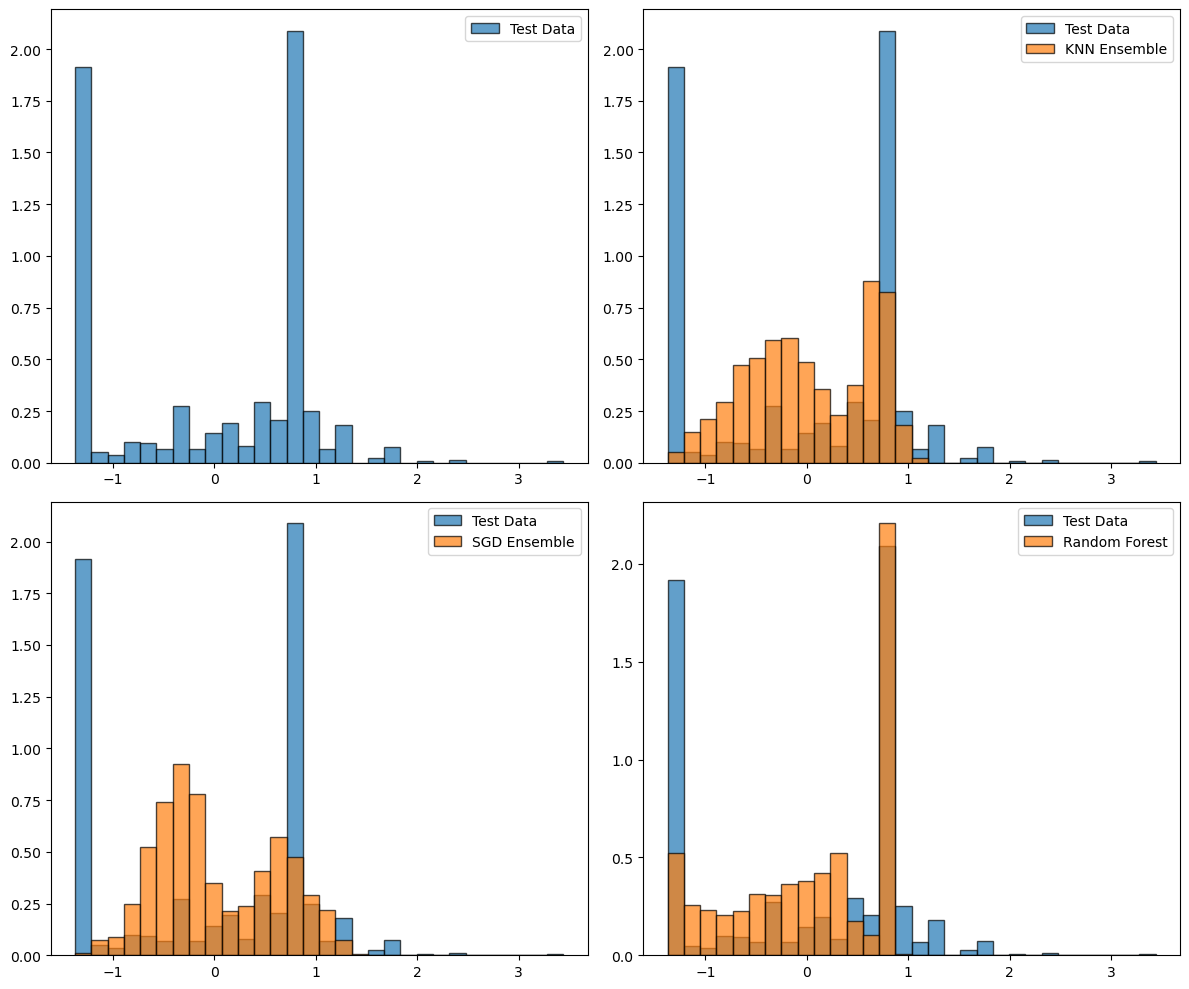

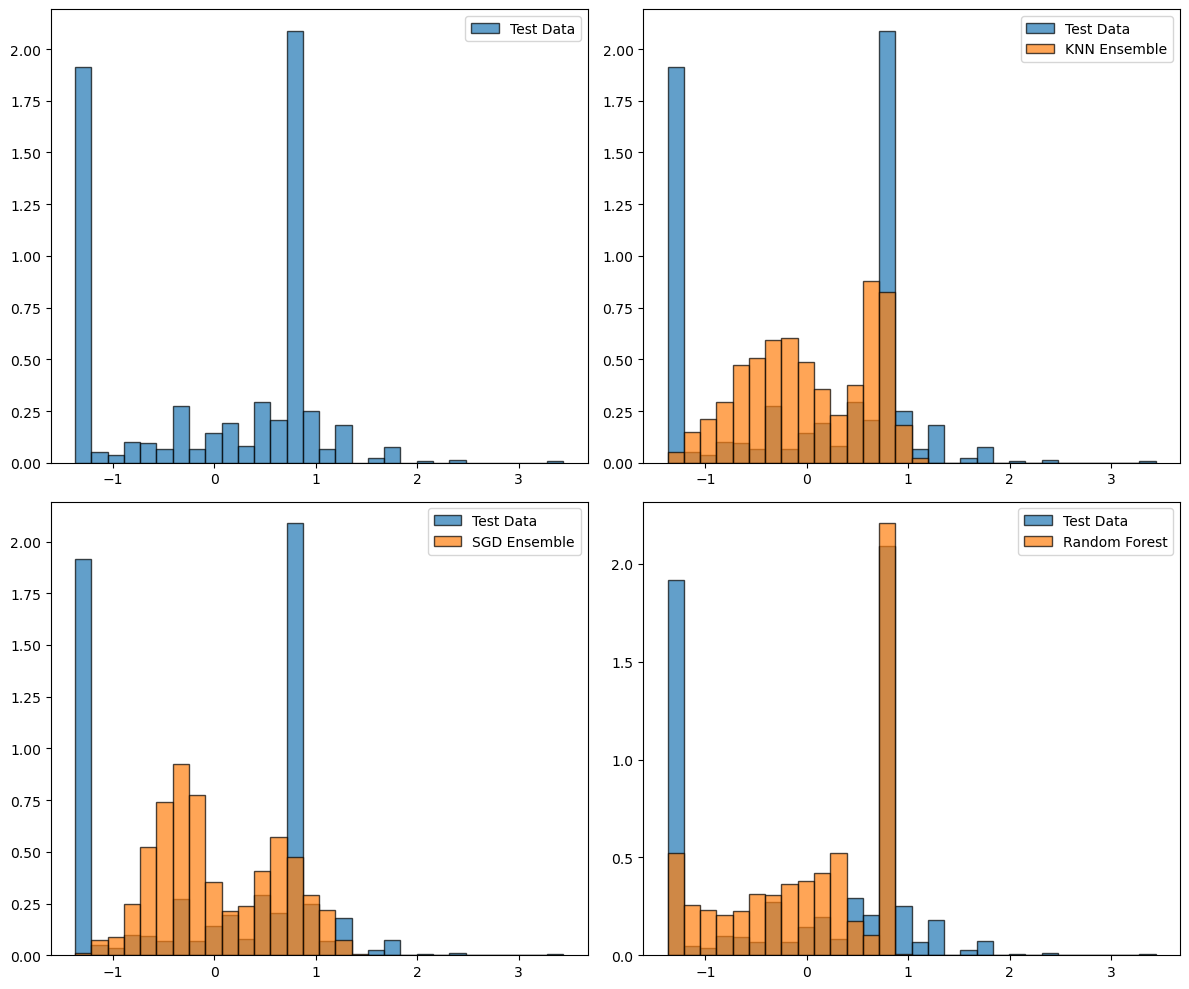

In [275]:
def ensemble_predict(models_dict, model_type, X_unseen, Y_unseen, test_df):
    ensemble_pred = [model.predict(X_unseen) for model in models_dict[model_type]['ensemble']]
    test_pred = np.mean(ensemble_pred, axis=0)
    test_df.loc['ET', model_type] = mean_absolute_error(Y_unseen, test_pred)

    return test_pred

# KNN predictions
Y_unseen_pred_KNN_1 = ensemble_predict(models_dict_1, 'KNN', X_unseen_1, Y_unseen_1, test_df_1)
Y_unseen_pred_KNN_2 = ensemble_predict(models_dict_2, 'KNN', X_unseen_2, Y_unseen_2, test_df_2)

# SGD predictions
Y_unseen_pred_SGD_1 = ensemble_predict(models_dict_1, 'SGD', X_unseen_1, Y_unseen_1, test_df_1)
Y_unseen_pred_SGD_2 = ensemble_predict(models_dict_2, 'SGD', X_unseen_2, Y_unseen_2, test_df_2)

# Tree predictions
Y_unseen_pred_Tree_1 = ensemble_predict(models_dict_1, 'Tree', X_unseen_1, Y_unseen_1, test_df_1)
Y_unseen_pred_Tree_2 = ensemble_predict(models_dict_2, 'Tree', X_unseen_2, Y_unseen_2, test_df_2)

def plot_histograms(Y_unseen, Y_unseen_pred_KNN, Y_unseen_pred_SGD, Y_unseen_pred_Tree):
    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    counts, bin_edges = np.histogram(Y_unseen, bins=30)

    axs[0, 0].hist(Y_unseen, bins=bin_edges, edgecolor='k', alpha=0.7, density=True, label='Test Data')
    axs[0, 0].legend()

    axs[0, 1].hist(Y_unseen, bins=bin_edges, edgecolor='k', alpha=0.7, density=True, label='Test Data')
    axs[0, 1].hist(Y_unseen_pred_KNN, bins=bin_edges, edgecolor='k', alpha=0.7, density=True, label='KNN Ensemble')
    axs[0, 1].legend()

    axs[1, 0].hist(Y_unseen, bins=bin_edges, edgecolor='k', alpha=0.7, density=True, label='Test Data')
    axs[1, 0].hist(Y_unseen_pred_SGD, bins=bin_edges, edgecolor='k', alpha=0.7, density=True, label='SGD Ensemble')
    axs[1, 0].legend()

    axs[1, 1].hist(Y_unseen, bins=bin_edges, edgecolor='k', alpha=0.7, density=True, label='Test Data')
    axs[1, 1].hist(Y_unseen_pred_Tree, bins=bin_edges, edgecolor='k', alpha=0.7, density=True, label='Random Forest')
    axs[1, 1].legend()

    plt.tight_layout()
    plt.show()

# Plot histograms for the first dataset
plot_histograms(Y_unseen_1, Y_unseen_pred_KNN_1, Y_unseen_pred_SGD_1, Y_unseen_pred_Tree_1)

# Plot histograms for the second dataset
plot_histograms(Y_unseen_2, Y_unseen_pred_KNN_2, Y_unseen_pred_SGD_2, Y_unseen_pred_Tree_2)


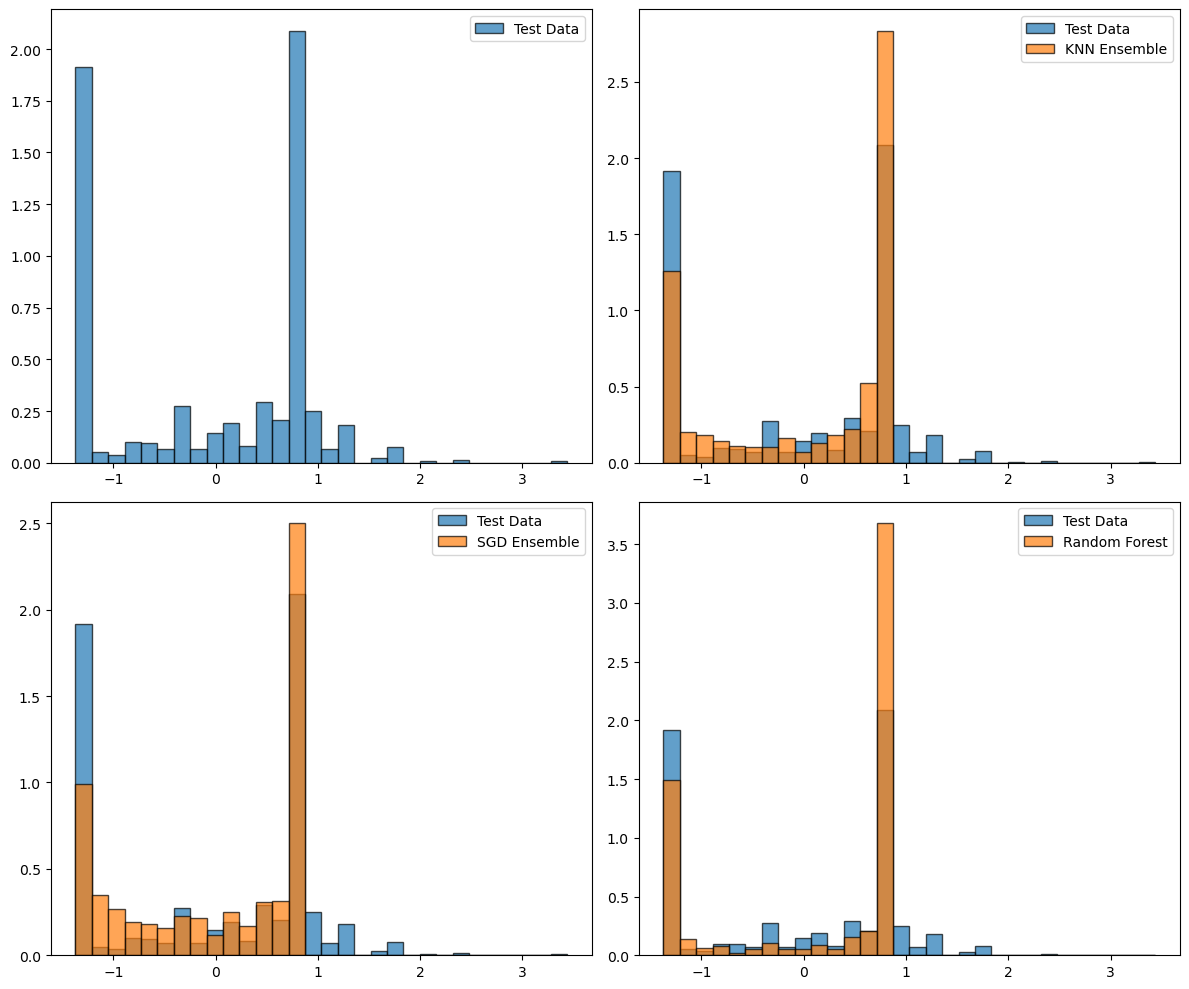

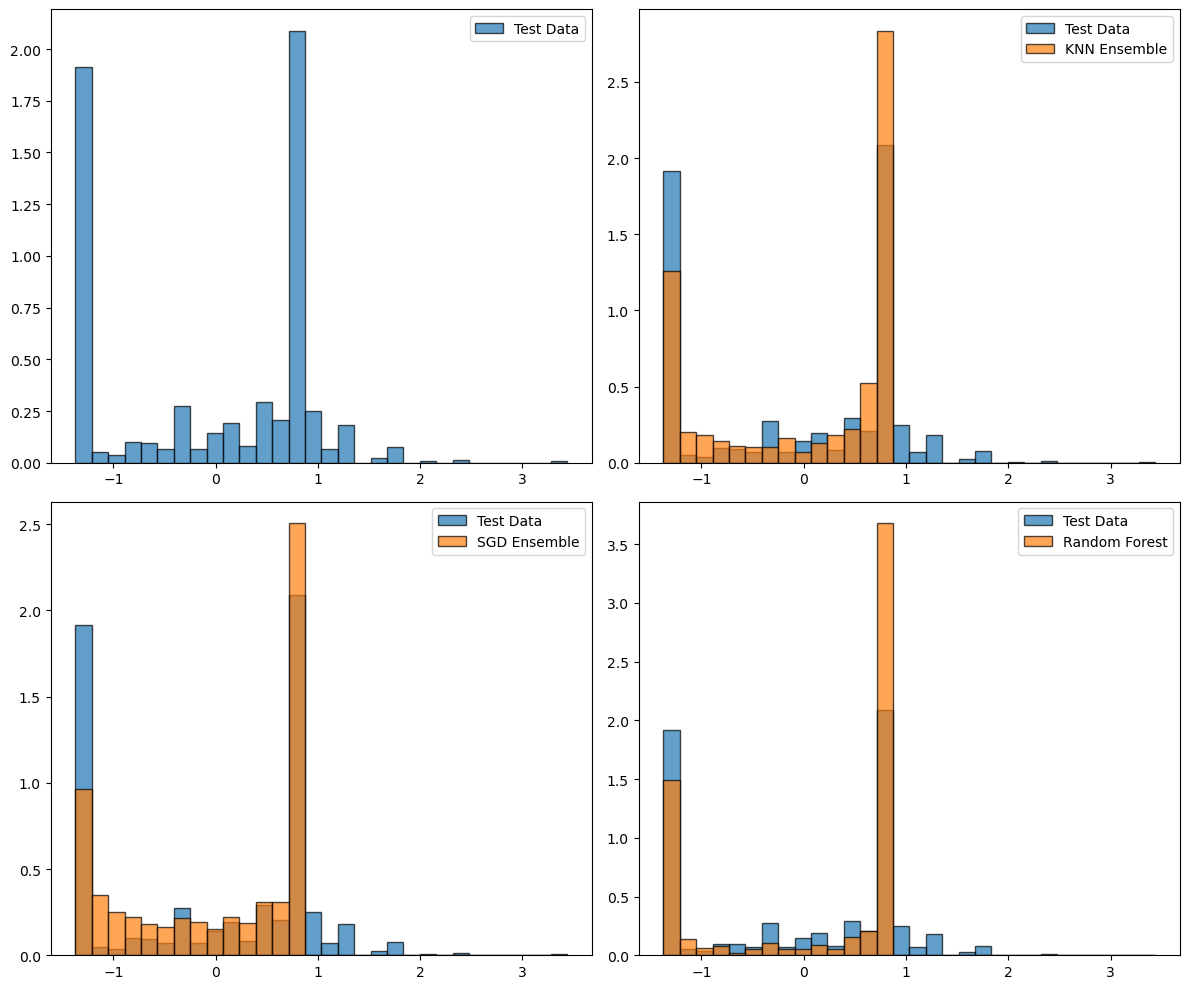

,KNN,SGD,Tree
D,12.015,12.453,13.913
T,11.735,12.388,10.782
TA,10.907,10.503,11.398
ET,11.700,12.443,11.017
BET,11.713,12.447,11.318
BETA,10.807,10.565,11.778


,KNN,SGD,Tree
D,0.642,0.668,0.732
T,0.627,0.662,0.576
TA,0.583,0.561,0.609
ET,0.625,0.665,0.589
BET,0.626,0.666,0.605
BETA,0.578,0.566,0.630


In [276]:
def selected_ensemble_predict(models_dict, model_type, X_unseen, Y_unseen, test_df, selected_models):
    ensemble_pred = [model.predict(X_unseen) for model in models_dict[model_type]['best_ensemble']]
    test_pred = np.mean(ensemble_pred[:selected_models], axis=0)
    test_df.loc['BET', model_type] = mean_absolute_error(Y_unseen, test_pred)

    test_pred_adjusted = np.array([soft_max_adjustnent(value) for value in test_pred])

    test_df.loc['BETA', model_type] = mean_absolute_error(Y_unseen, test_pred_adjusted)

    return test_pred_adjusted

selected_models = 5

# Find the index of the top best models on validation set
selected_ensemble_models_index_KNN = Ensembles_val_loss_1['KNN'].sort_values(ascending=True).index[:selected_models]
selected_ensemble_models_index_SGD = Ensembles_val_loss_1['SGD'].sort_values(ascending=True).index[:selected_models]
selected_ensemble_models_index_tree = Ensembles_val_loss_1['Tree'].sort_values(ascending=True).index[:selected_models]

# Get the top best models
models_dict_1['KNN']['best_ensemble'] = [models_dict_1['KNN']['ensemble'][index] for index in selected_ensemble_models_index_KNN]
models_dict_1['SGD']['best_ensemble'] = [models_dict_1['SGD']['ensemble'][index] for index in selected_ensemble_models_index_SGD]
models_dict_1['Tree']['best_ensemble'] = [models_dict_1['Tree']['ensemble'][index] for index in selected_ensemble_models_index_tree]

Y_unseen_pred_KNN_1_adjusted = selected_ensemble_predict(models_dict_1, 'KNN', X_unseen_1, Y_unseen_1, test_df_1, selected_models)
Y_unseen_pred_SGD_1_adjusted = selected_ensemble_predict(models_dict_1, 'SGD', X_unseen_1, Y_unseen_1, test_df_1, selected_models)
Y_unseen_pred_Tree_1_adjusted = selected_ensemble_predict(models_dict_1, 'Tree', X_unseen_1, Y_unseen_1, test_df_1, selected_models)


plot_histograms(Y_unseen_1, Y_unseen_pred_KNN_1_adjusted, Y_unseen_pred_SGD_1_adjusted, Y_unseen_pred_Tree_1_adjusted)


# Find the index of the top best models on validation set
selected_ensemble_models_index_KNN = Ensembles_val_loss_2['KNN'].sort_values(ascending=True).index[:selected_models]
selected_ensemble_models_index_SGD = Ensembles_val_loss_2['SGD'].sort_values(ascending=True).index[:selected_models]
selected_ensemble_models_index_tree = Ensembles_val_loss_2['Tree'].sort_values(ascending=True).index[:selected_models]

# Get the top best models
models_dict_2['KNN']['best_ensemble'] = [models_dict_2['KNN']['ensemble'][index] for index in selected_ensemble_models_index_KNN]
models_dict_2['SGD']['best_ensemble'] = [models_dict_2['SGD']['ensemble'][index] for index in selected_ensemble_models_index_SGD]
models_dict_2['Tree']['best_ensemble'] = [models_dict_2['Tree']['ensemble'][index] for index in selected_ensemble_models_index_tree]

Y_unseen_pred_KNN_2_adjusted = selected_ensemble_predict(models_dict_2, 'KNN', X_unseen_2, Y_unseen_2, test_df_2, selected_models)
Y_unseen_pred_SGD_2_adjusted = selected_ensemble_predict(models_dict_2, 'SGD', X_unseen_2, Y_unseen_2, test_df_2, selected_models)
Y_unseen_pred_Tree_2_adjusted = selected_ensemble_predict(models_dict_2, 'Tree', X_unseen_2, Y_unseen_2, test_df_2, selected_models)

plot_histograms(Y_unseen_2, Y_unseen_pred_KNN_2_adjusted, Y_unseen_pred_SGD_2_adjusted, Y_unseen_pred_Tree_2_adjusted)

display(test_df_1 * 18.707)
display(test_df_2)

### <font color="orange">  **Autograder** </font>

In [277]:
display(df_autograder)

estimate_MAE_on_new_data = np.array(test_df_2['SGD']['BETA']) * 18.707 # Y_2_std
print(f"Estimated MAE on new data: {estimate_MAE_on_new_data}")

predictions_autograder_data = np.array([model.predict(df_autograder) for model in models_dict_1['SGD']['best_ensemble']]).mean(axis=0)

# # Upload this file to the Vocareum autograder:
result = np.append(estimate_MAE_on_new_data, predictions_autograder_data)
pd.DataFrame(result).to_csv("autograder_submission.txt", index=False, header=False)

,hhi,whi,hhi2,education,race,hispanic,experience,kidslt6,kids618,husby,region
0,no,yes,no,16years,white,no,25.000,0.000,0.000,0.000,west
1,no,no,no,12years,white,no,41.000,0.000,0.000,0.000,south
2,yes,yes,yes,>16years,white,no,21.000,0.000,2.000,34.300,other
3,no,yes,yes,9-11years,NaN,no,46.500,0.000,0.000,0.000,other
4,no,no,no,13-15years,white,no,9.000,0.000,0.000,25.000,northcentral
...,...,...,...,...,...,...,...,...,...,...,...
17267,yes,no,yes,13-15years,NaN,no,39.000,0.000,0.000,0.000,other
17268,no,no,yes,9-11years,white,no,15.500,3.000,0.000,7.000,west
17269,yes,no,yes,12years,white,no,15.000,2.000,0.000,35.000,west
17270,no,no,no,13-15years,NaN,no,22.000,0.000,1.000,35.000,west


Estimated MAE on new data: 10.580891786371101


ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- hispanic
- race
- region
Feature names seen at fit time, yet now missing:
- hisp_no
- hisp_yes
- race_black
- race_nan
- race_other
- ...
